In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
from dateutil.relativedelta import relativedelta
idx = pd.IndexSlice
import random 
from scipy import stats

# Mine matching

In [2]:
## Primary supply data and patameters
operating_mine_pool=pd.read_excel('Data/primary supply/Operating mine pool.xls', sheet_name='Sheet1', index_col=0)
incentive_pool=pd.read_excel('Data/primary supply/Incentive mine pool.xls', sheet_name='Sheet1', index_col=0)
operating_mine_country=pd.read_excel('Map/Mine mapping.xlsx', sheet_name='Sheet1', index_col=0)

region_info=pd.DataFrame(0, index=operating_mine_pool.index, columns=['Region', 'Country'])
operating_mine_pool=pd.concat([operating_mine_pool, region_info], axis=1)

operating_mine_pool.iloc[:374, -2:]=\
operating_mine_country.loc[operating_mine_pool.index[:374], ['Global Region', 'Country Name']].values

dup_index=[]
forx i in operating_mine_pool.index[374:]:
    dup_index.append(i[:-4])
    
operating_mine_pool.iloc[374:, -2:]=\
operating_mine_country.loc[list(map(int, dup_index)), ['Global Region', 'Country Name']].values

SyntaxError: invalid syntax (<ipython-input-2-3b0a33f0cd6a>, line 12)

# Reading from file

In [2]:
mine_prod_baseline_baseline=pd.read_excel('Map/mine lvl prod baseline_baseline.xlsx', sheet_name='data', index_col=[0, 1, 2])
mine_prod_baseline_prs100=pd.read_excel('Map/mine lvl prod baseline_prs100.xlsx', sheet_name='data', index_col=[0, 1, 2])

In [5]:
country_operating_mine_reduction=(mine_prod_baseline_prs100.groupby(['Country']).sum().cumsum(axis=1).iloc[:, -1]-\
mine_prod_baseline_baseline.groupby(['Country']).sum().cumsum(axis=1).iloc[:, -1])

In [6]:
country_operating_mine_reduction.to_excel('Map/Country level mine reduction.xlsx')

<IPython.core.display.Javascript object>


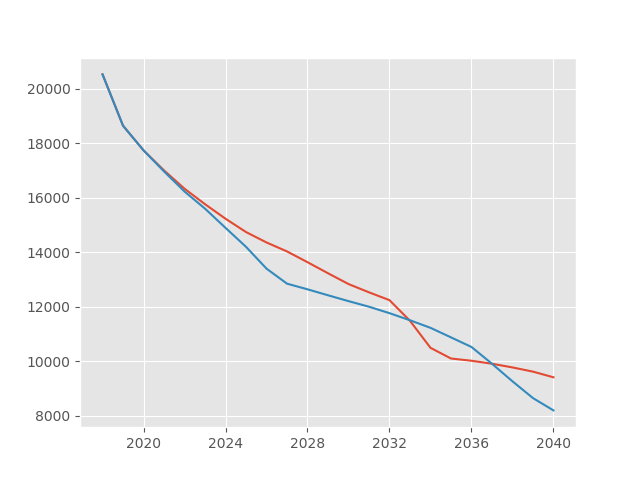

In [137]:
%matplotlib notebook
plt.style.use('ggplot')
plt.plot(mine_life_baseline_baseline.loc[:, idx[:, 'Recovered metal production (kt)']].iloc[:, :430].sum(axis=1))
plt.plot(mine_life_baseline_prs100.loc[:, idx[:, 'Recovered metal production (kt)']].iloc[:, :430].sum(axis=1))

plt.show()